1. perform facet grid of histograms and/or scatterplots, or...

# Data Analysis on bank loans from Prosper
## by Aaron Remski

> This dataset contains ~114,000 records containing data on bank loans. It includes 81 variables ranging from CreditGrade to StatedMonthlyIncome.

In [97]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows', 150) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format # set it to convert scientific notation such 
# as 4.22510e+11 to 42251000462321.00

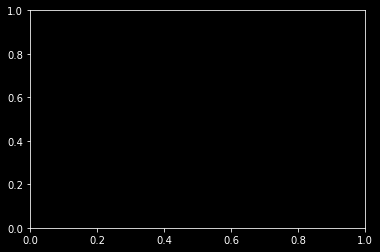

In [205]:
plt.ticklabel_format(axis='both', style='plain')

In [98]:
############################################################################
## (Un)Comment out if using a lighter background style in Jupyter
plt.style.use("dark_background")

In [99]:
# load data into pandas dataframe!
loanDF = pd.read_csv("prosperLoanData.csv")

## Dataset Overview


In [100]:
# width & height
loanDF.shape

(113937, 81)

In [101]:
# review loanDF variables & identify features that require additional tidying/cleaning
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [102]:
# see sample of data
loanDF.sample(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
77237,A575336459785020669A5EF,20557,2006-06-19 15:30:23.607000000,D,36,Completed,2009-06-27 00:00:00,0.2375,0.2300,0.2100,NaN,NaN,NaN,NaN,NaN,NaN,0,MI,NaN,NaN,NaN,False,True,C8023365164599360FC4F40,2006-06-19 15:10:33.757000000,620.0000,639.0000,1981-07-08 00:00:00,NaN,NaN,41.0000,12,353.0000,2.0000,6.0000,1.0000,NaN,1.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2100,Not displayed,True,6500.0000,371E33656761115422A3CC7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,93,1601,3000,2006-06-27 00:00:00,Q2 2006,F5783364809150067E23240,113.7500,4105.9000,3000.0000,1105.9000,-25.7200,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,26
60771,0BFF3591181468933D9E58F,924648,2013-09-25 16:48:24.557000000,NaN,36,Current,NaN,0.0953,0.0819,0.0719,0.0704,0.0174,0.0530,7.0000,AA,11.0000,14,CO,Computer Programmer,Employed,15.0000,False,False,NaN,2013-09-25 16:54:46,740.0000,759.0000,2001-02-14 00:00:00,7.0000,6.0000,42.0000,5,162.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3169.0000,0.0800,34031.0000,24.0000,0.9100,0.0000,0.1200,"$50,000-74,999",True,4583.3333,F77C3694746461559E2F0E8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,103521,2800,2013-10-01 00:00:00,Q4 2013,3E753694947816833DAE92B,87.9900,439.9500,349.6800,90.2700,-11.0300,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,59
16900,A788359030581799774B662,963957,2013-10-07 09:06:56.047000000,NaN,60,Current,NaN,0.2291,0.2045,0.1945,0.1797,0.0899,0.0898,4.0000,C,5.0000,2,FL,Other,Employed,62.0000,True,False,NaN,2013-10-07 09:06:58,700.0000,719.0000,2008-02-11 00:00:00,3.0000,3.0000,8.0000,2,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,1.0000,0.0000,0.1800,"$25,000-49,999",True,3750.0000,DC643694397070995C0D09C,2.0000,55.0000,55.0000,0.0000,0.0000,31500.0000,4153.3100,NaN,0,NaN,5,105511,10000,2013-10-09 00:00:00,Q4 2013,162B346603267298438C8EF,267.4500,1069.8000,390.6900,679.1100,-33.2100,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,56
52381,1CED3410061402481803418,262932,2008-01-10 13:03:08.857000000,C,36,Completed,2011-01-17 00:00:00,0.2845,0.2700,0.2600,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,Other,Self-employed,142.0000,True,False,NaN,2008-01-10 12:54:39.953000000,640.0000,659.0000,1984-12-01 00:00:00,4.0000,5.0000,22.0000,3,187.0000,2.0000,3.0000,2.0000,2845.0000,1.0000,1.0000,1.0000,4686.0000,1.1100,0.0000,22.0000,0.7700,0.0000,0.1000,"$75,000-99,999",True,6666.6667,DC6034104992059416FF25F,1.0

## Structure of Dataset summarized
* ~114,000 records with 81 characteritics on completed, defaulted, current, & other types of bank loans. <br>
### Noteable Features
IncomeRange, CreditGrade, Term, LoanStatus, CloseDate, BorowerAPR, BorrowerRate,  LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, ExmploymentStatus, ExmploymentStatusDuration, ListingNumber, ListingCreationDate, 

### Assessing Dataset

* Roughly 20 features can be removed to make it easier to manage the data <br>
* 4 (features)variables express dates, e.g. ListingCreationDate, ClosedDate, DateCreditPulled, LoanOriginationDate. Convert to datetime type<br>
* Several (variables)columns types need to be converted, e.g. CreditGrade, ProsperRating (Alpha), IncomeRange to ordered categorical type<br>


In [103]:
##################### DELETE THIS CELL? ########################################################
# Columns to keep
keep = ['ListingNumber','ListingCreationDate','CreditGrade','Term','LoanStatus','CloseDate','BorrowerAPR','BorrowerRate',
    'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)',
    'ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','ExmploymentStatus','ExmploymentStatusDuration']

In [104]:
# Columns to remove
remove = ['ListingKey', 'TotalTrades','TradesNeverDelinquent (percentage)', 'LoanKey','TotalProsperLoans','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPrincipalBorrowed',
          'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','LoanMonthsSinceOrigination',
          'LoanNumber','MemberKey']

## Data Cleaning

### Remove features that have too much data missing, provide no meaningful purpose, or validity in the present analysis.

In [105]:
# remove columns defined in 'remove' list to work with a roughly smaller dataframe
# show/verify remaining columns after removal

loanDF = loanDF.drop(remove, axis=1)
loanDF.columns

Index(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCre

### Convert alpha columns into ordered categories

In [106]:
# This is where the ordinal_categories will be defined & converted
# convert CreditGrade, ProsperRating (Alpha), & IncomeRange to ordinal categorical types
# CreditGrade, & ProsperRating (Alpha): order assumed

ordinal_dict = {'CreditGrade': ['AA','A','B','C','D','E','HR'],
                    'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR'],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999',
                                   '$1-24,999','0','Not employed','Not displayed']}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_dict[var])
    loanDF[var] = loanDF[var].astype(ordered_var)    

In [107]:
# confirm ordered categorical datatype converted
loanDF.CreditGrade.dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

In [108]:
# confirm IncomeRange dtype converted
loanDF.IncomeRange.dtype

CategoricalDtype(categories=['$100,000+', '$75,000-99,999', '$50,000-74,999',
                  '$25,000-49,999', '$1-24,999', '0', 'Not employed',
                  'Not displayed'],
, ordered=True)

### Datatime type updates

In [109]:
# Convert type of date fields to datetime64[ns]

datecols = ['ListingCreationDate','ClosedDate','DateCreditPulled','LoanOriginationDate']

for datecol in datecols:
    loanDF[datecol] = pd.to_datetime(loanDF[datecol])

In [110]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

In [111]:
# Verify conversion successful
loanDF.ListingCreationDate.dtype

dtype('<M8[ns]')

*If LoanOriginationQuarter is used for analysis it will need cleaning. For example "Q3 2015" should be "Q3", 3 or similar. The year should be removed as it's labelled in the LoanOriginationDATE, therefore, redundant.*

In [112]:
# pull year out This would normally be delt with let's see if we want to use it.
# 'LoanOriginationQuarter'

## This analysis will explore:
1. What are some common characteristics of 'successful' (completed) vs 'failed' (defaulted & chargedoff) loans?
2. Are there any surprising characteristics of 'successful' loans?
3. Do some of the expected/obvious value relationships check out? 
    a. higher creditscores correlate with lower interest rates
    b. high credit scores have higher rate of completion(repayment)
    c. low debt to income ratio correlates to higher IncomeRange

4. What are common characteristics of borrowers who have high interest rate, or default, or certain occupation?

## Features in the dataset that will help support the investigation
1. LoanStatus, 

# END of Data Wrangling
# 
# START of Analysis

## Demographics

In [234]:
loanDF.groupby('BorrowerState')['StatedMonthlyIncome'].mean().sort_values()

BorrowerState
ND    3279.653846153846
ME    3635.039603960396
IA   3714.0806451612902
ID    4181.806343906511
MT    4234.772727272727
SD   4322.9047619047615
MO    4710.546845124283
UT    4747.451539338655
AL    4759.589636688505
NE    4796.241839762612
VT    4817.429951690821
AR    4851.543859649123
MN    4912.573770491803
WI   4920.5846905537455
MS    4923.311308767471
KY     4929.05493387589
OK    4930.700308959836
MI    4931.872529919287
OH    4964.597569692638
WV    4971.434782608696
TN    5050.882556131261
IN    5094.556785370549
KS    5148.343691148776
SC    5230.617647058823
LA   5274.5503144654085
WY    5300.173333333333
AZ    5346.714886901631
WA    5379.247047244095
FL    5398.901636904762
PA    5415.518169582772
NC      5424.9682230869
GA    5460.474041533546
RI    5533.466666666666
NM    5545.277542372882
NV    5588.870642201835
IL    5590.496706637392
CO    5647.218552036199
OR    5661.970280682443
DE              5753.95
NH    5855.021778584392
AK              5880.33
TX

In [113]:
# Review IncomeRange for all loans - numerically
loanDF['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
0                     0
Name: IncomeRange, dtype: int64

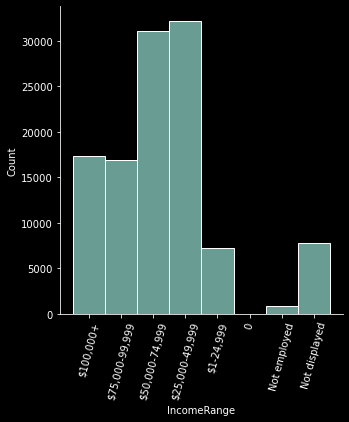

In [114]:
# see distribution of data on IncomeRange
sb.displot(data=loanDF, x='IncomeRange')
plt.xticks(rotation=75);

## Histogram Analysis - IncomeRange
* Roughly the same number of loans represented for IncomeRange 100k+ and 75k-100k, 17k records
* Roughly the same number of loans represented for IncomeRange 50k-75k and 25k-50k, 32k records
* Additional visuals will be using IncomeRange below


In [115]:
loanDF['StatedMonthlyIncome'].value_counts()

4166.6667     3526
5000.0000     3389
3333.3333     2917
3750.0000     2428
5416.6667     2374
              ... 
7069.9167        1
4266.3333        1
2211.7500        1
7032.9167        1
18756.0000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

In [207]:
loanDF['StatedMonthlyIncome'].describe()

count             113937.0
mean     5607.706925757217
std     7478.4905102183375
min                    0.0
25%                 3200.0
50%                 4666.0
75%                 6825.0
max              1750002.0
Name: StatedMonthlyIncome, dtype: float64

In [229]:
# HOw many records represent person's claiming to earn $40,000/month+
loanDF[loanDF.StatedMonthlyIncome >= 40000]['ListingNumber'].count()

154

Text(0.5, 0, 'Stated Monthly Income')

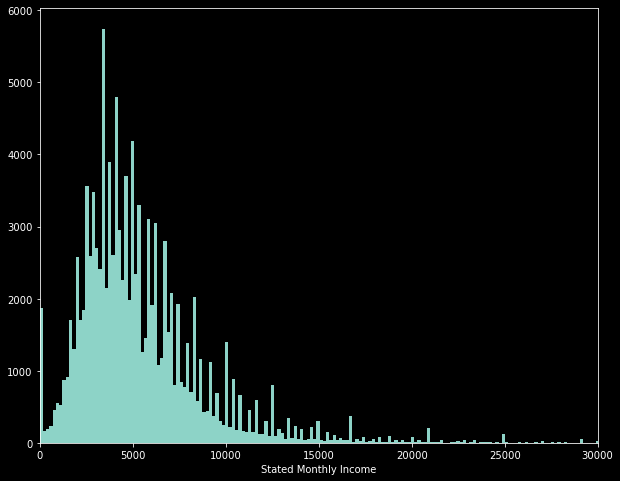

In [221]:
bins = np.arange(min(loanDF['StatedMonthlyIncome']), max(loanDF['StatedMonthlyIncome']), 10000)
plt.figure(figsize=[10,8])

plt.ticklabel_format(axis='both', style='plain')
plt.hist(data=loanDF, x='StatedMonthlyIncome', bins=10000)
plt.xlim([0,30000])
plt.xlabel('Stated Monthly Income')

<AxesSubplot:xlabel='StatedMonthlyIncome', ylabel='Density'>

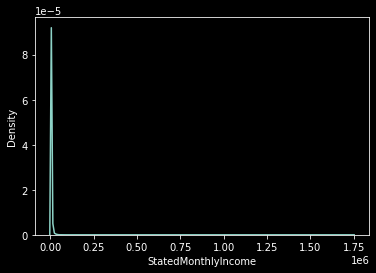

In [117]:
sb.kdeplot(data=loanDF, x='StatedMonthlyIncome')

## Histogram Analysis - StatedMonthlyIncome

In [118]:
loanDF['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

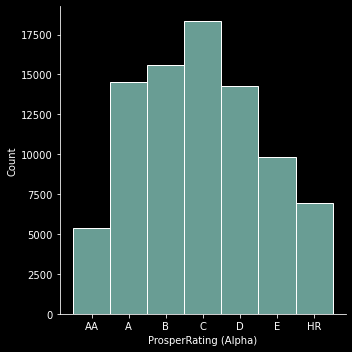

In [119]:
sb.displot(data=loanDF, x='ProsperRating (Alpha)');

## Histogram Analysis - ProsperRating (Alpha)

* Follows a normal distribution curve where 'C' represents the median (roughly)
* As expected 

In [120]:
# reveal number of records according to their LoanStatus
loanDF.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

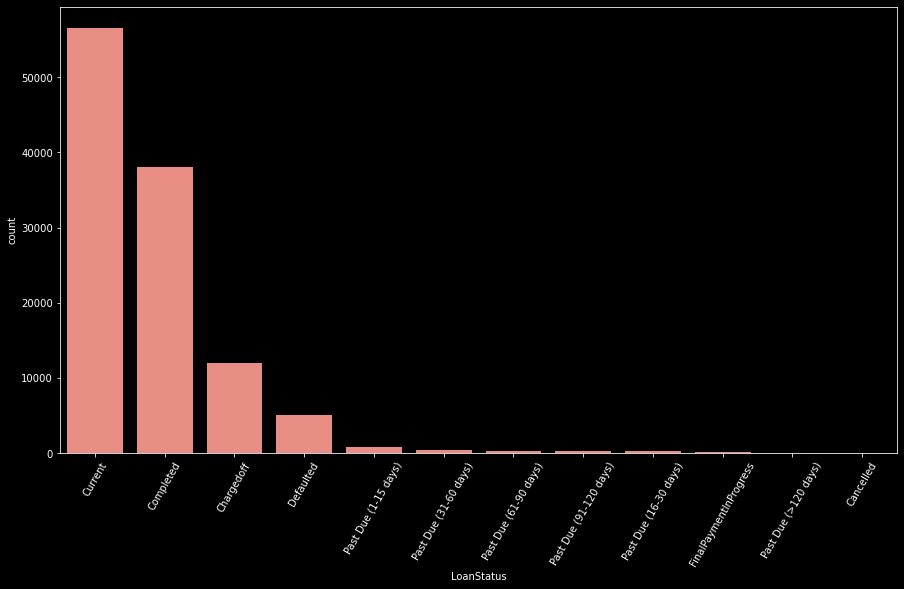

In [121]:
# Visualize LoanStatus distribution

fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([0.125, 0.125, 0.775, 0.775])
ax.tick_params(axis='x', rotation=60)
sb.countplot(data=loanDF, x='LoanStatus', color=sb.color_palette()[3], order=loanDF.LoanStatus.value_counts().index);

## Countplot analysis - LoanStatus
> As expected the majority of the bank loans are either current(good standing) or completed. However there is a healthy no. of ChargedOffs & Defaulted loans.<br/>
> I would like further analysis of ChargedOff & Defaulted 

In [122]:
loanDF3 = loanDF.copy()

In [123]:
# THIS IS NOT WORKING AS INTENTED
#loanDF3.drop(loanDF3.query('LoanStatus == "Completed" and LoanStatus == "Current"').index, inplace=True)
#loanDF3.sample(15)

In [124]:
''' Columns with small amount of data
EstimatedEffectiveYield
EstimatedLoss          
EstimatedReturn        
ProsperRating (numeric)
ProsperRating (Alpha)  
ProsperScore           
'''

' Columns with small amount of data\nEstimatedEffectiveYield\nEstimatedLoss          \nEstimatedReturn        \nProsperRating (numeric)\nProsperRating (Alpha)  \nProsperScore           \n'

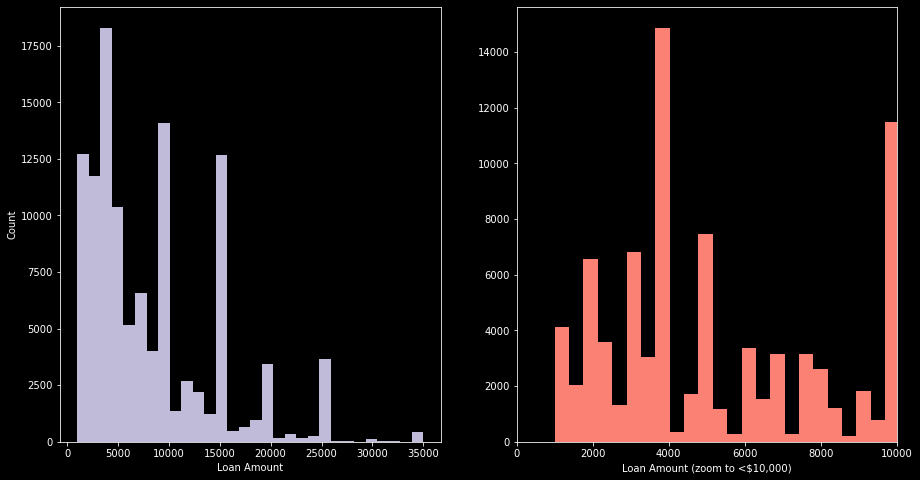

In [125]:
plt.figure(figsize=[15,8])
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
plt.subplot(1,2,1)
#plt.set_title("All loans")
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=30, color=sb.color_palette()[2]);

plt.subplot(1,2,2)
#plt.set_title("Loans <= $5000")
plt.xlabel('Loan Amount (zoom to <$10,000)')
plt.hist(data=loanDF3, x='LoanOriginalAmount', bins=90, color=sb.color_palette()[3]);
plt.xlim(0,10000);


## Histogram analysis - LoanAmount
* `$`4000 loan is the most prevalent loan amount. Additionally, loan amounts fall in `$`5,000 increments with the highest loans no greater than `$`35,000<br>
* There is a right-skew.<br>
* Nearly half of all Prosper loans are < $5000. What distinguishes these loans from the others?
* Investigate the `$`4000 loans<br>


In [126]:
Completed = loanDF.loc[loanDF['LoanStatus'] == 'Completed']
Current =  loanDF.loc[loanDF['LoanStatus'] == 'Current']
completed_current = pd.concat([Completed, Current])
completed_current.sample(5)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
98989,437855,2009-12-11 13:10:42.960,NaN,36,Completed,2012-12-30,0.1312,0.1100,0.1000,0.0787,0.0210,0.0787,6.0000,A,9.0000,3,OK,Professional,Self-employed,59.0000,False,False,NaN,2009-11-19 06:32:47,760.0000,779.0000,2002-04-24 00:00:00,1.0000,1.0000,2.0000,1,116.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6500.0000,0.0000,NaN,"$1-24,999",False,1666.6667,NaN,2000,2009-12-30,Q4 2009,5.1000,2271.7000,1941.2900,330.4100,-30.0500,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,152
42934,523041,2011-08-19 16:19:35.193,NaN,36,Current,NaT,0.3053,0.2699,0.2599,0.2534,0.1120,0.1414,3.0000,D,7.0000,7,CA,Nurse (RN),Employed,16.0000,False,False,NaN,2011-08-19 16:19:30,660.0000,679.0000,1992-09-16 00:00:00,4.0000,4.0000,29.0000,2,45.0000,0.0000,9.0000,0.0000,0.0000,19.0000,1.0000,0.0000,246.0000,0.2400,774.0000,0.0000,0.1100,"$100,000+",True,10333.3333,NaN,7000,2011-08-31,Q3 2011,285.7400,8557.2000,5451.0300,3106.1700,-115.0600,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,20
62091,595368,2012-06-02 05:13:23.887,NaN,36,Current,NaT,0.1832,0.1469,0.1369,0.1346,0.0420,0.0926,5.0000,B,6.0000,1,OH,Sales - Retail,Employed,70.0000,False,True,3D4D3366260257624AB272D,2012-05-18 06:11:39,720.0000,739.0000,2002-08-17 00:00:00,9.0000,7.0000,13.0000,6,158.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2990.0000,0.3100,6610.0000,0.0000,0.9900,"$1-24,999",True,1000.0000,14.0000,15000,2012-06-15,Q2 2012,517.7100,10354.2000,7512.0500,2842.1500,-193.5000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,150
71108,1020283,2013-12-01 13:17:52.767,NaN,36,Current,NaT,0.1380,0.1099,0.0999,0.0963,0.0324,0.0639,6.0000,A,7.0000,7,FL,Computer Programmer,Employed,14.0000,False,False,NaN,2013-12-01 13:17:54,740.0000,759.0000,1998-10-01 00:00:00,8.0000,5.0000,12.0000,5,230.0000,2.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,11585.0000,0.1700,53615.0000,1.0000,0.0800,"$75,000-99,999",True,7000.0000,NaN,9000,2013-12-10,Q4 2013,294.6100,586.5101,423.1700,163.3401,-15.1000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,1
67072,1123912,2014-01-21 10:48:17.320,NaN,36,Current,NaT,0.0903,0.0769,0.0669,0.0655,0.0174,0.0481,7.0000,AA,8.0000,1,OH,NaN,Other,0.0000,False,False,NaN,2014-01-21 10:48:19,740.0000,759.0000,2004-07-04 00:00:00,9.0000,9.0000,11.0000,9,266.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4244.0000,0.2300,13806.0000,0.0000,0.1600,"$25,000-49,999",True,2500.0000,NaN,4000,2014-01-24,Q1 2014,124.7700,123.9273,98.6500,25.2773,-3.4000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,1


In [127]:
# Get all bad loans into new DF
Defaulted = loanDF.loc[loanDF['LoanStatus'] == 'Defaulted']
Chargedoff =  loanDF.loc[loanDF['LoanStatus'] == 'Chargedoff']
defaulted_chargedoff = pd.concat([Defaulted, Chargedoff])
defaulted_chargedoff.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
102970,621862,2012-08-07 16:48:55.847,NaN,36,Chargedoff,2013-10-21,0.3580,0.3177,0.3077,0.2896,0.1625,0.1271,1.0000,HR,5.0000,19,MI,Other,Other,21.0000,True,False,NaN,2012-08-07 16:48:51.000,680.0000,699.0000,1991-07-26 00:00:00,10.0000,10.0000,27.0000,7,166.0000,1.0000,11.0000,0.0000,0.0000,43.0000,0.0000,0.0000,2478.0000,0.6900,333.0000,1.0000,0.1600,"$25,000-49,999",True,3500.0000,NaN,2000,2012-08-21,Q3 2012,86.8500,812.9500,206.6300,606.3200,-11.7000,-42.5000,1793.3700,1793.3700,0.0000,1.0000,0,0,0.0000,29
63252,587100,2012-05-09 08:52:22.050,NaN,36,Chargedoff,2013-04-19,0.2526,0.2148,0.2048,0.2000,0.0890,0.1110,4.0000,C,7.0000,3,NY,Professional,Employed,28.0000,False,False,NaN,2012-05-07 18:56:06.000,740.0000,759.0000,2001-03-19 00:00:00,10.0000,8.0000,21.0000,10,180.0000,0.0000,3.0000,0.0000,0.0000,7.0000,0.0000,0.0000,223.0000,0.0500,1636.0000,0.0000,NaN,"$25,000-49,999",False,2916.6667,NaN,15000,2012-05-18,Q2 2012,568.8300,3434.1500,1603.2800,1830.8700,-83.9400,0.0000,13396.7200,13396.7200,605.0000,1.0000,0,0,0.0000,60
55158,279936,2008-02-14 19:13:59.973,E,36,Chargedoff,2008-12-21,0.3375,0.3175,0.3075,NaN,NaN,NaN,NaN,NaN,NaN,1,CA,Other,Full-time,178.0000,False,False,NaN,2008-02-08 21:54:56.527,560.0000,579.0000,1999-04-19 00:00:00,4.0000,4.0000,9.0000,2,67.0000,3.0000,5.0000,0.0000,0.0000,6.0000,0.0000,0.0000,1538.0000,1.0000,17.0000,2.0000,0.1000,"$50,000-74,999",True,6166.6667,NaN,3000,2008-02-22,Q1 2008,130.2500,636.2500,224.1300,412.1200,-12.9800,0.0000,2775.8800,2775.8700,0.0000,1.0000,0,0,0.0000,39


In [128]:
defaulted_chargedoff.LoanOriginalAmount.sum()

109286564

#### $110,000,000 in bad loans. 

In [129]:
(110000000 / 950000000) * 100

11.578947368421053

#### 11.6% of the bank loans represented in this dataset are defaulted or chargedoff.

Text(0.5, 1.0, 'Defaulted Loan count vs. Chargedoff Loans')

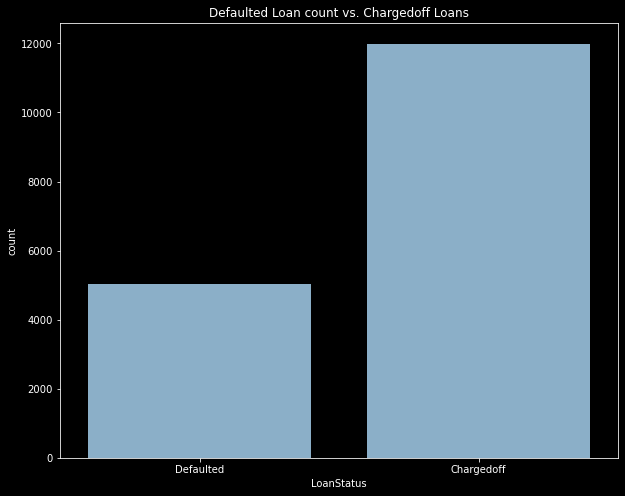

In [130]:
# Quick look at the distribution between 'defaulted' & 'Chargedoff' loans in new DF
ax = plt.figure(figsize=[10,8])
#ax.set_title('Defaulted vs. Chargedoff Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count')
#ax.set_title('BLABLABLA')
graph = sb.countplot(data=defaulted_chargedoff, x='LoanStatus', color=sb.color_palette()[4])
graph.set_title("Defaulted Loan count vs. Chargedoff Loans")

In [131]:


print(f"Total # of Completed Loans: {Completed.ListingNumber.count()}\nCompleted Loans mean interest rate: {Completed.BorrowerRate.mean()}")
print(f"Total # of Failed Loans: {defaulted_chargedoff.ListingNumber.count()}\nFailed Loans mean interest rate: {defaulted_chargedoff.BorrowerRate.mean()}")


Total # of Completed Loans: 38074
Completed Loans mean interest rate: 0.18642228423595686
Total # of Failed Loans: 17010
Failed Loans mean interest rate: 0.2317624103468487


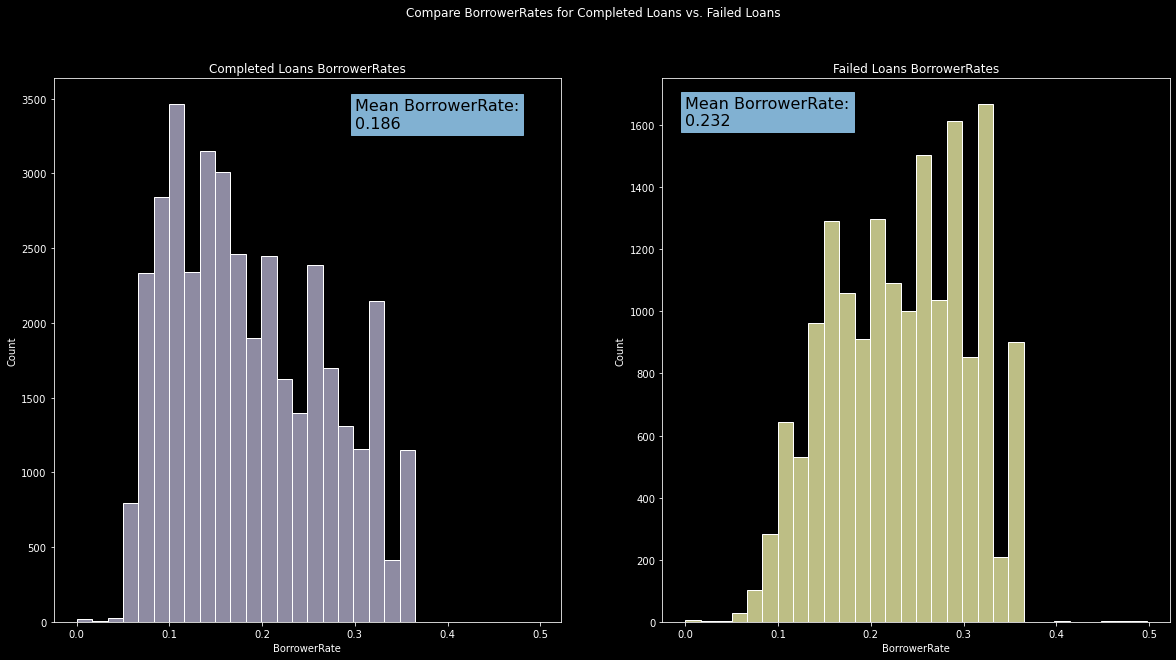

In [132]:
# Compare BorrowerRate's between the Completed loans & the Defaulted & ChargedOff
# would like to stack these but I don't want to single out the "completed" & "failed"
fig, ax = plt.subplots(1,2, figsize = (20,10))
fig.suptitle("Compare BorrowerRates for Completed Loans vs. Failed Loans")

style = dict(size=16, color='black', backgroundcolor=sb.color_palette()[4])

completed_mean = "Mean BorrowerRate:\n" + str(round(Completed.BorrowerRate.mean(),3))

ax[0].set_title("Completed Loans BorrowerRates")
ax[0].text(0.3,3305,completed_mean, **style)
#ax[1].annotate(str(Completed.BorrowerRate.mean()),(0.05,3250))
sb.histplot(data=Completed, x='BorrowerRate', bins=30, color=sb.color_palette()[2], ax=ax[0]);

failed_mean = "Mean BorrowerRate:\n" + str(round(defaulted_chargedoff.BorrowerRate.mean(),3))

ax[1].set_title("Failed Loans BorrowerRates")
ax[1].text(0,1600,failed_mean, **style)
#plt.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='white')
boxf = sb.histplot(data=defaulted_chargedoff, x='BorrowerRate', bins=30, color=sb.color_palette()[1], ax=ax[1]);

## Bivariate - BorrowRate & LoanStatus
## Histogram Analysis - BorrowerRate
Comparing the BorrowerRate distribution (& mean) for Failed Loans vs. Completed Loans. 

* There are double the number of completed loans to the number of failed loans. This is a much higher ratio than I would have guessed.
* As one might expect, the completed loans interest rates are lower vs. the failed loans
* There was nothing surprising that came from this visualization


In [133]:
Completed.ListingNumber.count()

38074

In [134]:
defaulted_chargedoff.ListingNumber.count()

17010

In [135]:
# get all records that match the query
past3160 = loanDF.query("LoanStatus == 'Past Due (31-60 days)'")
past6190 = loanDF.query("LoanStatus == 'Past Due (61-90 days)'")
past91120 = loanDF.loc[loanDF.LoanStatus == 'Past Due (91-120 days)']
past120 = loanDF.query("LoanStatus == 'Past Due (>120 days)'")

defaulted = loanDF.query("LoanStatus == 'Defaulted'")

all_past = pd.concat([past3160, past6190, past91120, past120])


In [136]:
all_past.sample(3)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
35265,829185,2013-07-05 12:27:28.093,NaN,60,Past Due (>120 days),NaT,0.2613,0.2359,0.2259,0.2085,0.0925,0.1160,3.0000,D,5.0000,13,CT,Other,Employed,69.0000,False,False,NaN,2013-07-05 12:27:09,640.0000,659.0000,2003-09-24 00:00:00,13.0000,12.0000,24.0000,5,190.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6252.0000,0.8000,1267.0000,1.0000,0.3400,"$25,000-49,999",True,3083.3333,12.0000,4500,2013-07-09,Q3 2013,128.3900,382.2616,119.8700,262.3916,-11.2500,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,1
87603,726291,2013-03-11 11:09:43.407,NaN,60,Past Due (31-60 days),NaT,0.2839,0.2579,0.2479,0.2274,0.1075,0.1199,3.0000,D,3.0000,15,NJ,Retail Management,Employed,82.0000,True,False,NaN,2013-03-11 11:09:37,740.0000,759.0000,1996-09-01 00:00:00,4.0000,4.0000,13.0000,2,153.0000,1.0000,6.0000,1.0000,185.0000,4.0000,1.0000,0.0000,17297.0000,0.7600,5191.0000,0.0000,0.1500,"$50,000-74,999",True,5500.0000,NaN,9500,2013-03-25,Q1 2013,283.2500,2549.2500,766.8000,1782.4500,-69.1100,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,59
23922,522046,2011-08-17 08:45:16.520,NaN,36,Past Due (>120 days),NaT,0.3564,0.3199,0.3099,0.2957,0.1470,0.1487,2.0000,E,4.0000,7,NJ,Analyst,Employed,84.0000,False,False,NaN,2011-08-17 08:45:08,680.0000,699.0000,2001-11-09 00:00:00,25.0000,22.0000,36.0000,7,199.0000,5.0000,5.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2459.0000,0.7000,1041.0000,1.0000,0.3200,"$50,000-74,999",True,4500.0000,NaN,7500,2011-08-30,Q3 2011,326.6200,6632.4800,5170.8100,1461.6700,-37.8000,0.0000,0.0000,0.0000,0.0000,1.0000,0,0,0.0000,94


In [137]:
all_past.LoanOriginalAmount.sum()

8083169

#### $8,000,000 in Past Due loans

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

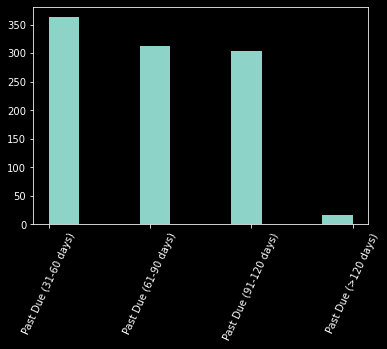

In [138]:
# plot distribution of LoanStatus where loanstatus == past due

plt.hist(data=all_past, x='LoanStatus')
plt.xticks(rotation=65)

## Histogram Analysis - Past Due

* There are roughly 1000 loans that are in a "past due" LoanStatus totalling $8,000,000 in loans
* There are no "CreditGrade" values for all entries with "past due" in LoanStatus


In [139]:
loanDF.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
Name: CreditGrade, dtype: int64

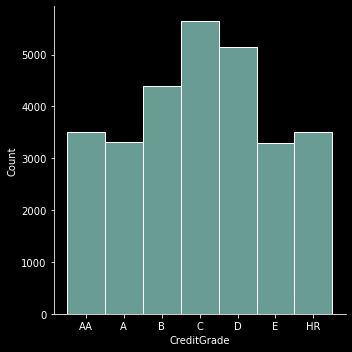

In [140]:
sb.displot(data=loanDF, x="CreditGrade")

## Histogram Analysis - Credit Grade

* Plotting a histogram of the CreditGrades indicates a normal distribution of CreditGrades across the spectrum of grades. 

In [141]:
loanDF3.query("LoanOriginalAmount <= 5000")['LoanOriginalAmount'].describe()

count   51824.0000
mean     3270.4115
std      1191.0671
min      1000.0000
25%      2250.0000
50%      3500.0000
75%      4000.0000
max      5000.0000
Name: LoanOriginalAmount, dtype: float64

In [142]:
# loans5000.CreditGrade.value_counts()
loanDF3.query("LoanOriginalAmount <= 5000")['CreditGrade'].value_counts()

D     3623
HR    3326
C     3184
E     2869
B     1803
AA    1577
A     1304
Name: CreditGrade, dtype: int64

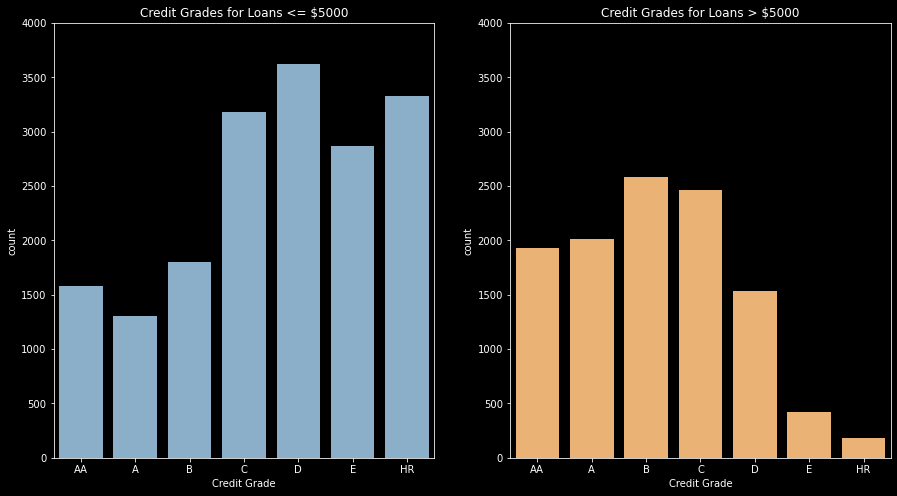

In [143]:
#sb.displot(data=loans5000, x='CreditGrade')
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)

#plt.xlabel('CreditGrade for Loans <= $5000')
graph2 = sb.countplot(data=(loanDF3.query("LoanOriginalAmount <= 5000")), x='CreditGrade', color=sb.color_palette()[4])
graph2.set(title="Credit Grades for Loans <= $5000")
plt.xlabel("Credit Grade")
plt.ylim(0,4000)

plt.subplot(1,2,2)
#plt.xtitle('CreditGrade for Loans <= $5000')
graph = sb.countplot(data=(loanDF3.query("LoanOriginalAmount > 5000")), x='CreditGrade',  color=sb.color_palette()[5]);
graph.set(title="Credit Grades for Loans > $5000")
plt.xlabel("Credit Grade")
#sb.displot(data=loans5000, x='CreditGrade');
plt.ylim(0,4000);

#graph.set_title("Credit Grade Distribution\n Loans > 5000 & Loans <= 5000")

## Bivariate Analysis
### What is the CreditGrade distribution for loans less than 5000 and for loans greater than 5000
* 45% of the loans are <= $5000 where the borrowers CreditGrade is predominately C or below!
* The creditgrades for loans <= 5000 are considerably lower than those that are > 5000<br>

In [144]:
loanDF3.LoanOriginalAmount.sum()

949894347

#### $950,000,000 ALL loans summation

In [145]:
# Total the Loan Original Amount for all Completed & Current loans 
completed_current['LoanOriginalAmount'].sum()

821818138

#### $820,000,000 Current or Completed loans summation

In [146]:
loanDF.groupby('CreditGrade')['LoanOriginalAmount'].mean()

CreditGrade
AA   9144.0658
A    9292.1638
B    8313.0813
C    6100.6635
D    4785.5275
E    3391.9413
HR   2453.6129
Name: LoanOriginalAmount, dtype: float64

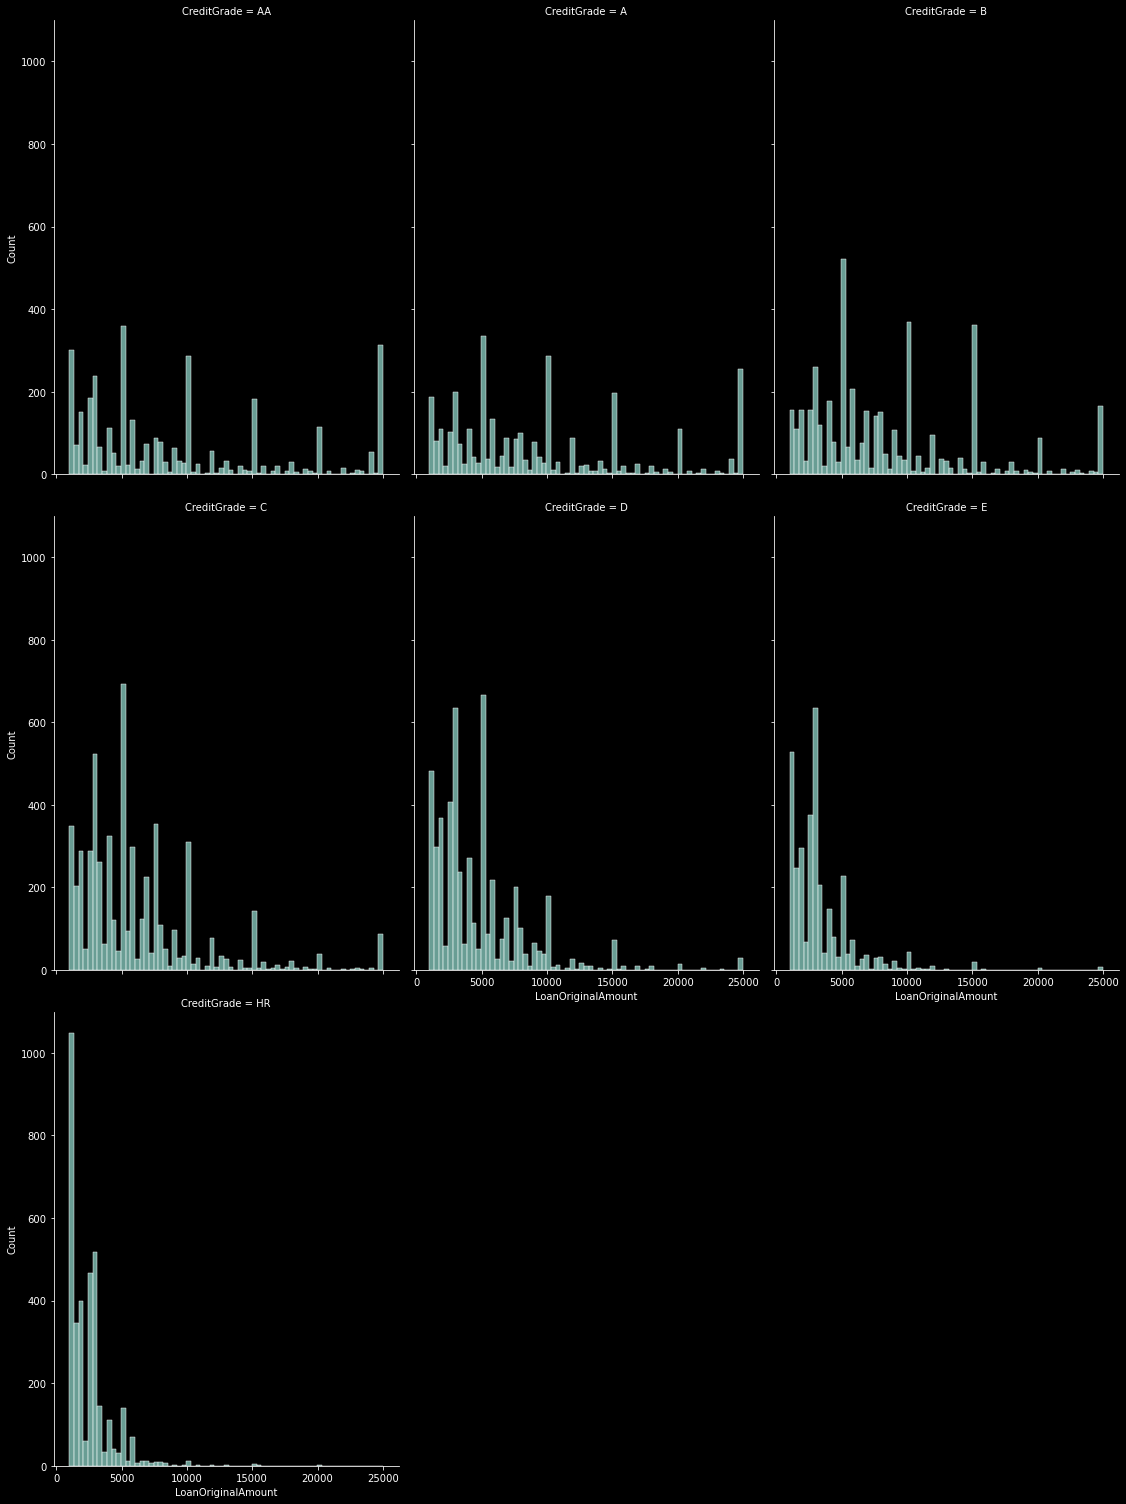

In [147]:

sb.displot(data=loanDF, x='LoanOriginalAmount', col="CreditGrade", height=7, aspect=.75, col_wrap=3)

#axes = axes.flatten()
#print(axes)

## Faceted Histogram Analysis

* 

# Bivariate Exploration 
## Defaulted & Chargedoff Loan relationships
#### For all past due accounts, what is the homeownership?

In [148]:
defaulted_chargedoff.IsBorrowerHomeowner.value_counts()

False    9405
True     7605
Name: IsBorrowerHomeowner, dtype: int64

In [149]:
#sb.displot(data=defaulted_chargedoff, x='IsBorrowerHomeowner', 

In [150]:
all_past.IsBorrowerHomeowner.value_counts()

True     498
False    498
Name: IsBorrowerHomeowner, dtype: int64

In [151]:
#sb.regplot(data=defaulted_chargedoff, x=LoanOriginalAmount

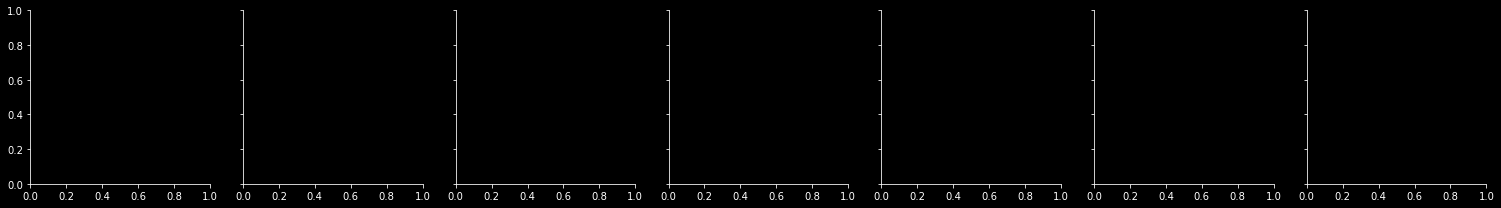

In [152]:
g = sb.FacetGrid(loanDF, col="CreditGrade")
#g.map(sb.hist
 #     
  #    plot, "LoanOriginalAmount")

In [153]:
# all past due loans, what are the homeownership stats?
homeowner = all_past.IsBorrowerHomeowner.value_counts().to_frame()

In [154]:
#sb.countplot(all_past.IsBorrowerHomeowner.value_counts().to_frame())

In [155]:
completed = loanDF.query("LoanStatus == 'Completed'")
completed.shape

(38074, 65)

In [156]:
# What does homeownership look like for loans that have been completed
completed.IsBorrowerHomeowner.value_counts()

False    19794
True     18280
Name: IsBorrowerHomeowner, dtype: int64

In [157]:
all_past.CreditScoreRangeLower.value_counts()

660.0000    181
680.0000    175
700.0000    149
640.0000    126
720.0000    117
740.0000     84
760.0000     57
620.0000     33
600.0000     26
780.0000     20
800.0000     17
820.0000     11
Name: CreditScoreRangeLower, dtype: int64

In [158]:
all_past.CreditScoreRangeUpper.value_counts()

679.0000    181
699.0000    175
719.0000    149
659.0000    126
739.0000    117
759.0000     84
779.0000     57
639.0000     33
619.0000     26
799.0000     20
819.0000     17
839.0000     11
Name: CreditScoreRangeUpper, dtype: int64

**LoanStatus** could be interesting to investigate further. For example, let's look at all "Past Due..." & look at various vars from there. **IncomeRange**, **CreditGrade**, **Occupation**

In [159]:
# view count of values
all_past.IncomeRange.value_counts()

$25,000-49,999    342
$50,000-74,999    287
$75,000-99,999    141
$100,000+         131
$1-24,999          81
Not employed       12
0                   0
Not displayed       0
Name: IncomeRange, dtype: int64

In [160]:
# view count of values
all_past.BorrowerRate.value_counts()

0.3177    103
0.3134     27
0.2699     21
0.3199     20
0.2489     18
         ... 
0.1970      1
0.1949      1
0.2710      1
0.1644      1
0.1999      1
Name: BorrowerRate, Length: 248, dtype: int64

In [161]:
# view count of values
print(all_past.CurrentDelinquencies.value_counts())
# This plot doesn't work
#sb.displot(all_past.CurrentDelinquencies.value_counts())

0.0000     759
1.0000     140
2.0000      36
3.0000      21
4.0000      11
5.0000      11
6.0000       5
9.0000       3
7.0000       2
8.0000       2
13.0000      2
14.0000      1
27.0000      1
10.0000      1
12.0000      1
Name: CurrentDelinquencies, dtype: int64


In [162]:
loanDF.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
0                     0
Name: IncomeRange, dtype: int64

**IncomeRange** -- another interesting variable to compare with others. I'm particularly interested in the $100,000+ bracket.

In [163]:
# explore breakdown of Monthly Incomes
pd.set_option('display.float_format', str)
loanDF['StatedMonthlyIncome'] = loanDF['StatedMonthlyIncome'].astype(np.int64)
loanDF['StatedMonthlyIncome'].describe()

count             113937.0
mean     5607.706925757217
std     7478.4905102183375
min                    0.0
25%                 3200.0
50%                 4666.0
75%                 6825.0
max              1750002.0
Name: StatedMonthlyIncome, dtype: float64

In [164]:
loanDF.Occupation.value_counts().head(30)

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Military Enlisted                     1272
Food Service Management               1239
Engineer - Electrical                 1125
Food Servic

### What characteristics correlate with lower interest rate for loans?

In [165]:
pd.__version__

'1.3.1'

In [166]:
# Show mean BorrowerRate by State
BorrowerRatebyState = loanDF.groupby('BorrowerState')['BorrowerRate'].mean().sort_values()
print(f"Top 5 states with lowest average interest rate: \n {BorrowerRatebyState.head(5)}")
print(f"Top 5 states with **highest** interest rate: \n{BorrowerRatebyState.tail(5)}")

Top 5 states with lowest average interest rate: 
 BorrowerState
IA   0.16375376344086023
ME   0.16445841584158413
DC    0.1744589005235602
DE    0.1801586666666667
MA    0.1838613291703836
Name: BorrowerRate, dtype: float64
Top 5 states with **highest** interest rate: 
BorrowerState
SD   0.20484179894179894
ID   0.20513205342237062
AR   0.20630257309941522
ND   0.21147307692307693
AL   0.21201375818939844
Name: BorrowerRate, dtype: float64


In [167]:
# Show mean Debt-to-Income-Ratio by State
DebtRatiobyState = loanDF.groupby('BorrowerState')['DebtToIncomeRatio'].mean().sort_values()
print(f"Top 5 states with lowest debt to income ratio: \n {DebtRatiobyState.head(5)}")
print(f"Top 5 states with **highest** deb to income ratio: \n{DebtRatiobyState.tail(5)}")

Top 5 states with lowest debt to income ratio: 
 BorrowerState
DC     0.225564738292011
NJ   0.23115855792789639
NY    0.2434477721642764
MA    0.2472519151977132
RI                 0.248
Name: DebtToIncomeRatio, dtype: float64
Top 5 states with **highest** deb to income ratio: 
BorrowerState
ID   0.30108107011070107
MS     0.301362782369146
WY    0.3123880597014925
MT    0.3591666666666667
UT   0.36550190597204574
Name: DebtToIncomeRatio, dtype: float64


In [168]:
# get top 15 occupations with highest Stated monthly incomes
occupation_income = loanDF.groupby('Occupation')['StatedMonthlyIncome'].mean().sort_values(ascending=False)
occupation_income.head(15)

Occupation
Doctor                       14936.613360323887
Attorney                     11569.706500956023
Judge                        10807.772727272728
Executive                    10737.662259336581
Dentist                      10547.779411764706
Pharmacist                   10208.081712062256
Investor                      9390.233644859813
Pilot - Private/Commercial    8818.336683417085
Engineer - Chemical           8527.662222222221
Principal                     7688.990384615385
Military Officer              7582.031791907514
Engineer - Electrical         7562.134222222222
Computer Programmer           7143.675748101831
Professional                  7049.856765482829
Nurse (RN)                    6752.228605865809
Name: StatedMonthlyIncome, dtype: float64

In [169]:
# lowest stated monthly incomes by occupation
occupation_income.tail(15)

Occupation
Bus Driver                            3673.018987341772
Sales - Retail                       3574.9116910976045
Laborer                              3432.0802507836993
Clerical                              3120.766434892541
Food Service                           2773.73285841496
Nurse's Aide                         2767.5254582484727
Waiter/Waitress                      2454.0573394495414
Teacher's Aide                       2155.5978260869565
Student - College Graduate Student   2054.3020408163266
Student - Community College          1677.2857142857142
Student - College Freshman            1608.219512195122
Student - Technical School                    1368.8125
Student - College Senior              1299.404255319149
Student - College Junior              1189.919642857143
Student - College Sophomore          1005.0434782608696
Name: StatedMonthlyIncome, dtype: float64

In [170]:
# create dictionary to translate "Listing Category (numerical)"
listingcategory_dict = {
    0:'Not Available',
    1:'Debt Consolidation',
    2:'Home Improvement',
    3:'Business',
    4:'Personal Loan',
    5:'Student Use',
    6:'Auto',
    7:'Other',
    8:'Baby & Adoption',
    9:'Boat',
    10:'Cosmetic Procedure',
    11:'Engagement Ring',
    12:'Green Loans',
    13:'Household Expenses',
    14:'Large Purchases',
    15:'Medical/Dental',
    16:'Motorcycle',
    17:'RV',
    18:'Taxes',
    19:'Vacation',
    20:'Wedding Loans'
}

In [171]:
# test dictionary
listingcategory_dict[10]

'Cosmetic Procedure'

In [172]:
# How many loans are there of each ListingCategory
listcat_loans = loanDF['ListingCategory (numeric)'].value_counts().sort_values().tail(10)
print(f"Top 10 Listing Categories \n{listcat_loans}")
print(f"\nTotal # of loans represented by the top 10: {listcat_loans.sum()}")

Top 10 Listing Categories 
18      885
15     1522
13     1996
4      2395
6      2572
3      7189
2      7433
7     10494
0     16965
1     58308
Name: ListingCategory (numeric), dtype: int64

Total # of loans represented by the top 10: 109759


In [173]:
# Convert Series 'listcat' to dataframe using to_frame()
listcat = listcat_loans.to_frame()
listcat

,ListingCategory (numeric)
18,885
15,1522
13,1996
4,2395
6,2572
3,7189
2,7433
7,10494
0,16965
1,58308


In [174]:
listcat.name = 'ListingCategory'

In [175]:
listcat['Listing Category'] = listcat.index
listcat

,ListingCategory (numeric),Listing Category
18,885,18
15,1522,15
13,1996,13
4,2395,4
6,2572,6
3,7189,3
2,7433,2
7,10494,7
0,16965,0
1,58308,1


In [176]:
# delete
for i in enumerate(listcat_loans.index):
    print(i)

(0, 18)
(1, 15)
(2, 13)
(3, 4)
(4, 6)
(5, 3)
(6, 2)
(7, 7)
(8, 0)
(9, 1)


In [177]:
# delete
for i in listcat_loans.index:
    print(i)

18
15
13
4
6
3
2
7
0
1


In [178]:
listingcategory_dict

{0: 'Not Available',
 1: 'Debt Consolidation',
 2: 'Home Improvement',
 3: 'Business',
 4: 'Personal Loan',
 5: 'Student Use',
 6: 'Auto',
 7: 'Other',
 8: 'Baby & Adoption',
 9: 'Boat',
 10: 'Cosmetic Procedure',
 11: 'Engagement Ring',
 12: 'Green Loans',
 13: 'Household Expenses',
 14: 'Large Purchases',
 15: 'Medical/Dental',
 16: 'Motorcycle',
 17: 'RV',
 18: 'Taxes',
 19: 'Vacation',
 20: 'Wedding Loans'}

In [179]:
#listcat.columns = ['count','category']
listcat

,ListingCategory (numeric),Listing Category
18,885,18
15,1522,15
13,1996,13
4,2395,4
6,2572,6
3,7189,3
2,7433,2
7,10494,7
0,16965,0
1,58308,1


In [180]:
#listcat.drop('Category', inplace=True)

In [181]:
listcat_dict = listingcategory_dict.copy()

In [182]:
listcat_dict

{0: 'Not Available',
 1: 'Debt Consolidation',
 2: 'Home Improvement',
 3: 'Business',
 4: 'Personal Loan',
 5: 'Student Use',
 6: 'Auto',
 7: 'Other',
 8: 'Baby & Adoption',
 9: 'Boat',
 10: 'Cosmetic Procedure',
 11: 'Engagement Ring',
 12: 'Green Loans',
 13: 'Household Expenses',
 14: 'Large Purchases',
 15: 'Medical/Dental',
 16: 'Motorcycle',
 17: 'RV',
 18: 'Taxes',
 19: 'Vacation',
 20: 'Wedding Loans'}

In [183]:
#index = 3
#print(f"listcat_loans: {listcat_loans.}")

'''for i in len(listcat):
    listcat['category'] = listingcategory_dict[listcat[i]]
        
#print(f"listcat_loans.loc[index]: {listcat_loans.loc[index]}")
listcat_loans'''

'for i in len(listcat):\n    listcat[\'category\'] = listingcategory_dict[listcat[i]]\n        \n#print(f"listcat_loans.loc[index]: {listcat_loans.loc[index]}")\nlistcat_loans'

In [184]:
#listcat_loans['Category'] = listingcategory_dict[listcat_loans.loc[index]
listcat

,ListingCategory (numeric),Listing Category
18,885,18
15,1522,15
13,1996,13
4,2395,4
6,2572,6
3,7189,3
2,7433,2
7,10494,7
0,16965,0
1,58308,1


#### 1-Debt Consolidation @ 58308, 0-Not Avail., 7-other, 2-Home Improvement @ 7433, 3-Business @ 7189, 6-Auto @ 2572 

The category of the listing that the borrower selected when posting their listing: <br/><br/>
*0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement,* <br/>
*3 - Business, 4 - Personal Loan*, 5 - Student Use, <br/>
*6 - Auto, 7- Other*, 8 - Baby&Adoption, 9 - Boat, <br/>
10 - Cosmetic Procedure, 11 - Engagement Ring, <br/>
12 - Green Loans, *13 - Household Expenses*, 14 - Large Purchases, <br/>
*15 - Medical/Dental*, 16 - Motorcycle, 17 - RV, <br/>
*18 - Taxes*, 19 - Vacation, 20 - Wedding Loans <br/>

### What is the structure of your dataset?

> The Prosper Loan Data set is 113937 records with 81 variable/columns. Loan data includes everything from loan type, to BorrowerRate

### What is/are the main feature(s) of interest in your dataset?

> Greatest interest so far: loan amount, interest rate, term. The items that make the loan most attractive and least attractive on the opposite side of the spectrum  . Any other trends that are peculiar, etc.

> Explore characteristics of all past due accounts

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ListingCategory, IncomeRange, CreditGrade, Occupation, StatedMonthlyIncome, 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

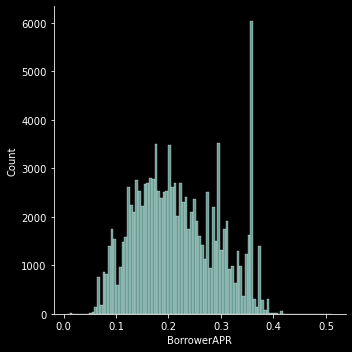

In [185]:
# Univarite exploration of BorrowerAPR
sb.displot(loanDF['BorrowerAPR']);

In [186]:
# What is going on with the interest rate around 0.36? Why are there so many loans with this percentage
borrAPR36 = loanDF.query('BorrowerAPR > 0.36 and BorrowerAPR < 0.37')
borrAPR36.shape

(420, 65)

In [187]:
borrAPR36.sample(10)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperPaymentsBilled,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
105544,464002,2010-06-25 10:58:33.547,NaN,36,Completed,2013-07-08,0.36742,0.343,0.333,0.1776,0.14,0.1776,2.0,E,6.0,7,MN,Accountant/CPA,Full-time,61.0,False,False,NaN,2010-06-18 09:37:16.000,680.0,699.0,2001-02-01 00:00:00,3.0,3.0,11.0,3,49.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,918.0,0.29,703.0,1.0,0.08,"$25,000-49,999",True,3166,NaN,4000,2010-07-08,Q3 2010,179.36,6468.11,4000.0,2468.11,-71.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,53
11035,305322,2008-04-06 18:37:38.847,E,36,Completed,2010-09-28,0.36213,0.35,0.34,NaN,NaN,NaN,NaN,NaN,NaN,4,MN,Other,Full-time,61.0,False,True,3D4D3366260257624AB272D,2008-03-26 11:06:29.373,560.0,579.0,1997-08-01 00:00:00,6.0,6.0,24.0,2,56.0,6.0,12.0,1.0,0.0,9.0,1.0,0.0,794.0,0.99,16.0,4.0,0.32,"$25,000-49,999",True,2666,6.0,4999,2008-04-16,Q2 2008,226.13,7992.57,4999.01,2993.56,-85.54,0.0,0.0,0.0,0.0,1.0,0,0,0.0,36
96665,364761,2008-07-09 18:00:10.593,E,36,Completed,2010-01-29,0.36438,0.34,0.33,NaN,NaN,NaN,NaN,NaN,NaN,2,MI,Skilled Labor,Full-time,43.0,True,False,NaN,2008-07-09 17:51:06.670,560.0,579.0,1997-12-22 00:00:00,4.0,4.0,23.0,0,0.0,4.0,23.0,6.0,2544.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,"$25,000-49,999",True,2600,NaN,1000,2008-07-22,Q3 2008,44.67,1220.21,1000.0,220.21,-6.04,0.0,0.0,0.0,0.0,1.0,0,0,0.0,21
26535,271651,2008-01-26 08:14:03.120,D,36,Chargedoff,2009-07-01,0.36349,0.35,0.34,NaN,NaN,NaN,NaN,NaN,NaN,4,CA,Construction,Full-time,74.0,False,False,NaN,2008-01-23 14:32:38.660,600.0,619.0,1996-07-08 00:00:00,4.0,4.0,28.0,1,0.0,1.0,8.0,5.0,13165.0,9.0,0.0,0.0,0.0,0.0,2500.0,0.0,0.16,"$50,000-74,999",True,5469,11.0,4500,2008-01-31,Q1 2008,203.56,2413.48,567.07,1846.41,-49.75,-146.2,3932.93,3932.93,0.0,1.0,0,0,0.0,38
82435,422853,2009-09-04 13:37:11.190,NaN,36,Chargedoff,2013-01-23,0.36845,0.3275,0.3175,0.1188,0.18,0.1188,1.0,HR,4.0,1,CA,Military Enlisted,Full-time,54.0,False,True,1783338468470790930346D,2009-08-25 14:46:26.000,640.0,659.0,2004-09-05 00:00:00,9.0,7.0,13.0,4,298.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,6513.0,0.97,90.0,3.0,0.53,"$25,000-49,999",True,2500,33.0,1000,2009-09-23,Q3 2009,43.97,1538.95,957.8,581.15,-17.73,0.0,42.2,42.2,0.0,1.0,1,0,0.0,22
5882,439186,2009-12-19 16:52:50.200,NaN,36,Completed,2012-12-31,0.36438,0.34,0.33,-0.0345,0.345,-0.0345,1.0,HR,1.0,1,TX,Teacher,Full-time,4.0,False,False,NaN,2009-12-04 12:41:40.000,600.0,619.0,1996-06-01 00:00:00,5.0,5.0,23.0,4,105.0,2.0,4.0,5.0,718.0,3.0,2.0,0.0,1829.0,1.25,0.0,0.0,0.31,"$1-24,999",True,1126,16.0,2800,2009-12-31,Q4 2009,98.85,4514.11,2800.0,1714.11,-50.4,0.0,0.0,0.0,0.0,1.0,0,0,0.0,68
65529,407609,2008-10-02 17:54:18.800,HR,36,Chargedoff,2009-07-16,0.36158,0.3,0.29,NaN,NaN,NaN,NaN,NaN,NaN,7,AR,Other,Full-time,55.0,False,False,NaN,2008-10-02 17:51:51.393,520.0,539.0,2006-04-25 00:00:00,0.0,0.0,4.0,0,0.0,1.0,3.0,1.0,124.0,

Some observations (not interesting):
1. The personal loan people had the lowest average credit score, students loans next
2. The RV loan types had the highest average credit score. This infers that people who have the ability to buy RVs are in better financial situations.

### What is going on with the BorrowerAPR/Rate at 31-33% & 36-37%, well over 5000 records? Let's investigate additional info about these records

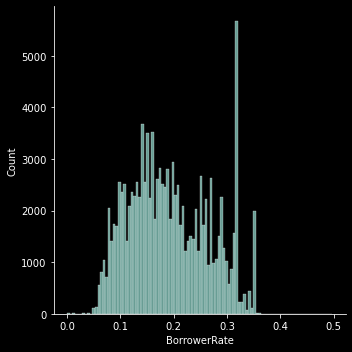

In [188]:
sb.displot(loanDF['BorrowerRate']);

In [189]:
# explore the spike in BorrowerRate around 0.3
BorrRate30 = loanDF.query("BorrowerRate <= 0.33 and BorrowerRate >= 0.30")
BorrRate30.shape

(9512, 65)

In [190]:
BorrRate30.Occupation.value_counts().head(20)

Other                                2900
Professional                         1043
Administrative Assistant              450
Teacher                               343
Sales - Retail                        326
Clerical                              291
Sales - Commission                    262
Executive                             247
Accountant/CPA                        238
Computer Programmer                   222
Skilled Labor                         221
Retail Management                     206
Analyst                               197
Laborer                               172
Nurse (RN)                            172
Food Service                          142
Construction                          133
Military Enlisted                     130
Police Officer/Correction Officer     128
Civil Service                         127
Name: Occupation, dtype: int64

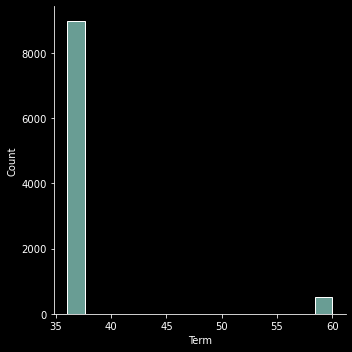

In [191]:
sb.displot(BorrRate30['Term']);

Loan Terms = some 12 month, majority are 36 mnth loans, but healthy percentage at 60 mnth (5 year loan)

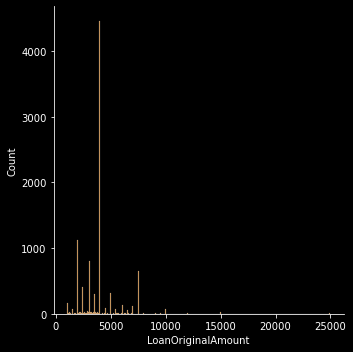

In [192]:
base_color = sb.color_palette()[5]
sb.displot(data = BorrRate30, x = 'LoanOriginalAmount', color = base_color);


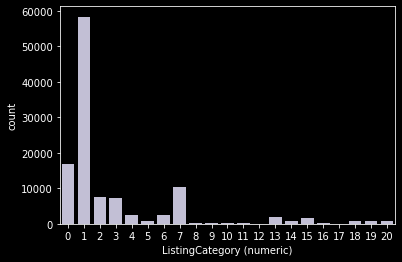

In [193]:
# Use Seaborn's CountPlot as an alternative to compare with plt.hist & seaborn's distplot

base_color = sb.color_palette()[2]
sb.countplot(data = loanDF, x = 'ListingCategory (numeric)', color = base_color);

The category of the listing that the borrower selected when posting their listing: <br/>
    0 - Not Available, <br/>
    1 - Debt Consolidation, <br/>
    2 - Home Improvement, <br/>
    3 - Business, <br/>
    4 - Personal Loan, <br/>
    5 - Student Use, <br/>
    6 - Auto, <br/>
    7- Other, <br/>
    8 - Baby&Adoption, <br/>
    9 - Boat, <br/>
    10 - Cosmetic Procedure, <br/>
    11 - Engagement Ring, <br/>
    12 - Green Loans, <br/>
    13 - Household Expenses, <br/>
    14 - Large Purchases, <br/>
    15 - Medical/Dental, <br/>
    16 - Motorcycle, <br/>
    17 - RV, <br/>
    18 - Taxes, <br/>
    19 - Vacation, <br/>
    20 - Wedding Loans <br/>


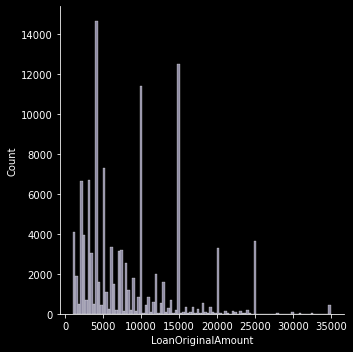

In [194]:
# plot the distribution of LoanAmounts
base_color = sb.color_palette()[2]
sb.displot(data = loanDF, x = 'LoanOriginalAmount', color = base_color);

1. Significant number of loans are multiples of 5000
2. Majority of loans are $15k and less 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [195]:
borrAPR36.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

ListingCategory (numeric)
0   3889.2291666666665
1    3553.309523809524
2   3130.8571428571427
3    8671.377358490567
4    2843.978723404255
5    4220.916666666667
6               2300.0
7    2988.235294117647
Name: LoanOriginalAmount, dtype: float64

In [196]:
loanDF.groupby('ListingCategory (numeric)')['LoanOriginalAmount'].mean()

ListingCategory (numeric)
0     6253.853286177424
1      9908.35214721822
2     8092.084757163999
3     8926.859229378217
4     4556.670563674322
5     3514.568783068783
6     5000.647356143079
7     5911.547074518772
8     9751.396984924622
9     8734.117647058823
10    5683.516483516483
11    7636.944700460829
12     8456.57627118644
13    5285.486973947895
14     8771.90296803653
15    6524.268068331143
16    5560.809210526316
17   8148.7692307692305
18    7580.425988700565
19         5357.6953125
20    8835.726329442283
Name: LoanOriginalAmount, dtype: float64

In [197]:
borrAPR36.groupby('ListingCategory (numeric)')['CreditScoreRangeUpper'].mean()

ListingCategory (numeric)
0               558.2
1   632.3333333333334
2   664.7142857142857
3   666.5471698113207
4   590.9148936170212
5               649.0
6               647.0
7   649.8823529411765
Name: CreditScoreRangeUpper, dtype: float64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [198]:
test = 123
print(test)

123
